I keep checking [San Diego County's Covid-19 webpage](https://www.sandiegocounty.gov/content/sdc/hhsa/programs/phs/community_epidemiology/dc/2019-nCoV/status.html) for up-to-date stats. I'm interested in the number of new cases per day, since that's what tells us if Covid-19 is spreading at an exponential rate (which would be _really_ scary – see [Simulating an epidemic](https://www.youtube.com/watch?v=gxAaO2rsdIs) by Grant Sanderson of 3blue1brown). The county website has new cases per day already, but also shows that the test rate fluctuates wildly. Now what I'm wondering is whether the new cases per day is indicative of _actual_ new cases or only the number of tests.

First let's get the data.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (12, 3)

We can find the query URL [here](https://sdgis-sandag.opendata.arcgis.com/datasets/covid-19-statistics-san-diego-county?orderBy=date&orderByAsc=false&selectedAttribute=tests).

In [2]:
query_url = 'https://gis-public.sandiegocounty.gov/arcgis/rest/services/Hosted/COVID_19_Statistics_San_Diego_County/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
response = requests.get(query_url)

if response.status_code == 200:
    print('Successfully ran API query')

Successfully ran API query


In [3]:
response.json().keys()

dict_keys(['exceededTransferLimit', 'features', 'fields', 'geometryType', 'spatialReference', 'globalIdFieldName', 'objectIdFieldName', 'hasZ', 'hasM'])

In [4]:
len(response.json()['features'])

65

Probably one for each day, it's been about two months since mid-March when California started quarantining.

In [5]:
# we're working with such a small dataset that we don't have to worry about computation time.
# It'd probably take me longer to optimize than the time I'd save optimizing.
example = response.json()['features'][0]
cols = example['attributes'].keys()
df = pd.DataFrame(columns=cols)

for feature in response.json()['features']:
    df = df.append(pd.Series(feature['attributes']), ignore_index=True)

#df.set_index('objectid', inplace=True)
df.sort_values('date', inplace=True)

df.head()

,objectid,date,tests,positives,hospitalized,icu,deaths,newcases,age_9,age10_19,...,age80_plus,ageunknow,age20_29,genderfemale,gendermale,gendeunk,age30_39,globalid,newtests,rolling_perc_pos_cases
27,87.0,1.583568e+12,None,1.0,0,0,0,1.0,None,None,...,None,None,None,None,None,None,None,{CE98E5A7-7D8E-4D20-BC84-069A17D43232},None,None
28,88.0,1.583654e+12,None,2.0,0,0,0,1.0,None,None,...,None,None,None,None,None,None,None,{8AC07123-E9DA-4D83-9720-7BF93E4B6C44},None,None
29,89.0,1.583741e+12,None,2.0,0,0,0,0.0,None,None,...,None,None,None,None,None,None,None,{52083240-452D-41A6-BD0F-2D424B2745BC},None,None
30,90.0,1.583827e+12,None,4.0,0,0,0,2.0,None,None,...,None,None,None,None,None,None,None,{9DF87361-2D53-4A06-8DF9-A986B660061D},None,None
0,59.0,1.583914e+12,123,5.0,None,None,None,1.0,None,None,...,None,None,None,None,None,None,None,{78698F35-A6E9-48CB-8C8D-67A70EC15C1D},None,None


Alright, data is there, but not exactly in the format we want.

First, let's convert the date from an integer to a datetime

In [6]:
# todo - convert data to how we want it

Okay, now that we have the data, let's try our first approach. Let's just overlay the two graphs:

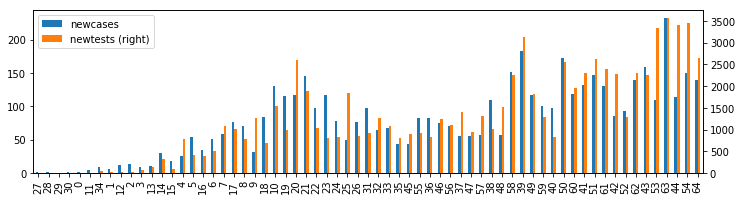

In [7]:
df[['newcases', 'newtests']].plot.bar(figsize=figsize, secondary_y= 'newtests');

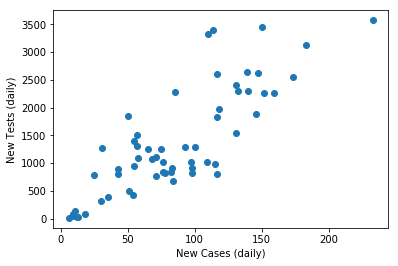

In [8]:
plt.scatter(df['newcases'].values, df['newtests'].values)
plt.ylabel('New Tests (daily)')
plt.xlabel('New Cases (daily)');